This notebook looks into alpha diversity in response to reviewer comments.

In [19]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
falpha = '../../data/analysis/alpha_diversity.txt'
df = pd.read_csv(falpha, sep='\t')
df.head()

,subject_id,site,mbs_consolidated,ppi_consolidated,number of full colum events/total events,Total number of reflux episodes (acid+non-acid),percent proximal total,percent distal total,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?,sample,alpha,alpha_metric
0,01-112-7,gastric_fluid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-112-7GI,5.502939,shannon
1,01-112-7,rectal_swab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-112-7RI,5.653931,shannon
2,01-112-7,throat_swab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-112-7TI,5.344570,shannon
3,01-164-7,gastric_fluid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-164-7GI,4.994163,shannon
4,01-164-7,rectal_swab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-164-7RI,5.125064,shannon


In [21]:
df.shape

(1758, 15)

## Filter samples

Keep only the samples we use throughout the rest of the paper.

In [22]:
print(df.shape)

samples = list(df['sample'])
# Don't include samples from second time point or lung transplants
exclude = ['2', 'F', 'sick', 'F2T']
for s in exclude:
    samples = [i for i in samples if not i.endswith(s)]
samples = [i for i in samples if not i.startswith('05')]

# Also remove rectal swab samples (I didn't use these at all)
df = df.query('site != "rectal_swab"')

df = df.query('sample == @samples')
print(df.shape)

(1758, 15)
(1350, 15)


In [23]:
print(df['subject_id'].unique().shape)

(222,)


# Alpha diversity vs. aspiration

In [35]:
df['alpha_metric'].unique()

array(['shannon', 'chao1', 'simpson'], dtype=object)

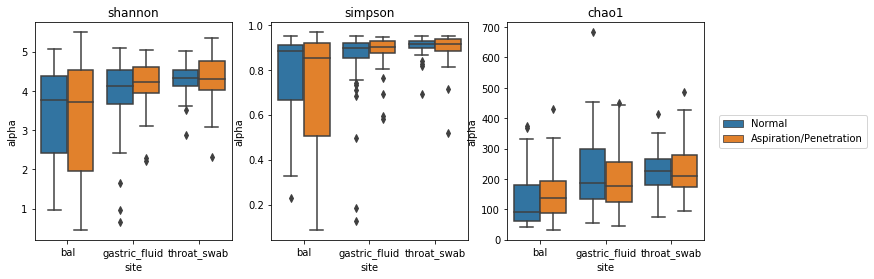

In [37]:
sites = ['bal', 'gastric_fluid', 'throat_swab']
metrics = ['shannon', 'simpson', 'chao1']

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

i = 0
for m in metrics:
    sns.boxplot(data=df.query('alpha_metric == @m'), 
            x='site', y='alpha', hue='mbs_consolidated',
            ax=ax[i], order=sites)
    ax[i].set_title(m)
    ax[i].legend_.remove()
    i +=1
ax[i-1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

### P values

In [46]:
from scipy.stats import ranksums

asp = 'Aspiration/Penetration'
nml = 'Normal'

for m in metrics:
    print(m)
    for s, subdf in df.query('alpha_metric == @m').groupby('site'):
        x = subdf.query('mbs_consolidated == @asp')['alpha'].tolist()
        y = subdf.query('mbs_consolidated == @nml')['alpha'].tolist()
        print(s, ranksums(x, y))
    print('')

shannon
('bal', RanksumsResult(statistic=-0.5322153283296696, pvalue=0.5945768677511445))
('gastric_fluid', RanksumsResult(statistic=0.8231079972079913, pvalue=0.4104465814365591))
('stool', RanksumsResult(statistic=nan, pvalue=nan))
('throat_swab', RanksumsResult(statistic=0.3839058750921019, pvalue=0.7010482117291654))

simpson
('bal', RanksumsResult(statistic=-0.7630557117015745, pvalue=0.4454301711760703))
('gastric_fluid', RanksumsResult(statistic=0.9383431168171101, pvalue=0.34806810841693725))
('stool', RanksumsResult(statistic=nan, pvalue=nan))
('throat_swab', RanksumsResult(statistic=-0.08859366348279275, pvalue=0.9294048440921486))

chao1
('bal', RanksumsResult(statistic=1.327332204388453, pvalue=0.18439881527167867))
('gastric_fluid', RanksumsResult(statistic=-0.6090999179339136, pvalue=0.5424582119857813))
('stool', RanksumsResult(statistic=nan, pvalue=nan))
('throat_swab', RanksumsResult(statistic=-0.11812488464372366, pvalue=0.9059687063925705))



# Make prettier figure

In [58]:
asp_colors = {'Normal': '#B25116', 'Aspiration/Penetration': '#FB84D1', 'nan': '#C9C9C9'}
light_pink = '#FFC9EC'
light_brown = '#E5B699'

boxprops = {'edgecolor': 'k', 'linewidth': 2.5}#, 'facecolor': 'w'}
lineprops = {'color': 'k', 'linewidth': 2.5}

kwargs = {'palette': asp_colors,
          'hue_order': ['Normal', 'Aspiration/Penetration']}

/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


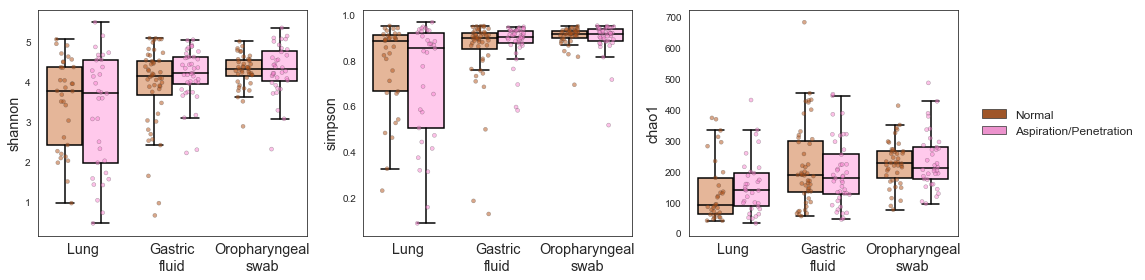

In [95]:
## Set up colors, orders, and kwargs

# Overall properties
kwargs = {'palette': asp_colors,
          'hue_order': ['Normal', 'Aspiration/Penetration']}

# Boxplot properties
boxprops = {'edgecolor': 'k'} #, #, 'facecolor': 'w'}
lineprops = {'color': 'k'} #, 'linewidth': 0.95}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops}, 
                      **kwargs)
# Stripplot properties
stripplot_kwargs = dict({'linewidth': 0.4, 'size': 4, 'alpha': 0.5}, 
                        **kwargs)

# Label stuff
site_labels = {'bal': 'Lung',
               'throat_swab': 'Oropharyngeal\nswab',
               'gastric_fluid': 'Gastric\nfluid'}

## Set up plot
sns.set_style('white')
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

i = 0
for m in metrics:
    sns.boxplot(data=df.query('alpha_metric == @m'), 
        x='site', y='alpha', hue='mbs_consolidated',
        ax=ax[i], order=sites,
        fliersize=0, **boxplot_kwargs)
    sns.stripplot(data=df.query('alpha_metric == @m'),
        x='site', y='alpha', hue='mbs_consolidated',
        ax=ax[i], order=sites, 
        split=True, jitter=0.2, **stripplot_kwargs)

    # Change face color of boxplots
    for k, artist in enumerate(ax[i].artists):    
        if k % 2 == 1:
            artist.set_facecolor(light_pink)
        else:
            artist.set_facecolor(light_brown)

    ax[i].set_ylabel(m, fontsize='x-large')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([site_labels[d.get_text()] for d in ax[i].get_xticklabels()],
                         fontsize='x-large')
    
    #ax[i].set_title(m)
    ax[i].legend_.remove()
    i +=1

## Fix legend
i = i-1
handles, labels = ax[i].get_legend_handles_labels()
lgd = ax[i].legend(handles[0:2], labels[0:2], 
              fontsize='large',
              bbox_to_anchor=(1.05, 0.5), frameon=False,
              loc='center left')
#              bbox_to_anchor=(0.5, 1.15), 
#              loc='upper center', 
#              ncol=2, frameon=False)
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]

#ax[i-1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()

fig.savefig('../../final/figures/suppfig.alpha_diversity.png', dpi=200)

In [64]:
df.query('alpha_metric == "shannon"').groupby(['site', 'mbs_consolidated']).size()

site           mbs_consolidated      
bal            Aspiration/Penetration    33
               Normal                    33
gastric_fluid  Aspiration/Penetration    41
               Normal                    48
throat_swab    Aspiration/Penetration    36
               Normal                    43
dtype: int64